## SHOPPING TRENDS ANALYSIS

#### PROBLEM STATEMENT

**TrendStyle,** a retail clothing store chain owned by Mr. Alex, has been experiencing a decline in sales and an increase in customer churn across multiple locations. Despite implementing various promotions and marketing campaigns, these efforts have not successfully reversed the negative trend. Mr. Alex needs data-driven insights to identify the key factors contributing to customer churn, understand customer purchasing behavior, and develop effective strategies to improve retention and boost sales.

This project aims to analyze customer shopping data to:

- Identify the top 5 factors contributing to customer churn.
- Segment customers based on purchasing behavior and demographics.
- Evaluate the impact of discount strategies on customer lifetime value (CLV) and retention.
- Predict customers at high risk of churning using machine learning models.
- Provide actionable recommendations to improve customer loyalty and sales performance.
  
By utilizing data analytics and predictive modeling, this project will help Mr. Alex make informed decisions to enhance customer retention and boost sales thus ensuring long-term business growth. 

In [4]:
#import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

In [5]:
!pip install -U kaleido

In [6]:
#load the dataset
df=pd.read_csv('C:/Users/ELITEBOOK 810/Desktop/DATA SCIENCE/Interview Project/shopping_trends.csv')
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

### **Exploratory Data Analysis (EDA)**

In [8]:
#Check the data shape
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 3900
Number of columns: 19


In [9]:
#Check for missing values
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [10]:
#Check for duplicates
df.duplicated().sum()

0

In [11]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

### Data Type

* Categorical Columns(14): Gender, Item Purchased, Category, Location, Size, Color, Season, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Preferred Payment Method, Frequency of Purchases

* Numerical Columns(5): Customer ID, Age, Purchase Amount (USD), Previous Purchases, Review Rating

In [13]:
#Check for descriptive statistics of the dataset
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

#### Summary
* The dataset contains 3900 indivisuals for all the variables.
* Age - Minimum age is 18 while maximum age is 70 and most of the individuals are aged between 31 and 57 years.
* Purchase Amount (USD) - Minimum amount is 20 while maximum age is 100 and most of the individuals are spend between 39 and 81 dollars.
* Review Rating - Minimum rating is 2.5 while the maximum  is 5. The average review rating is 3.7.
* Previous Purchases - Varies between 1 and 50. Customers have made an average of 25 past purchases.

### Visualizations

#### Univariate Visualizations

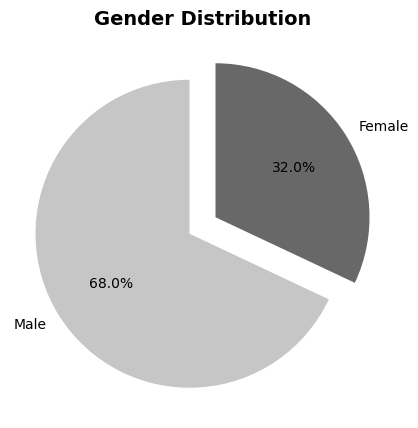

In [17]:
# Set the size of the figure
plt.figure(figsize=(8,5))
# Calculate the counts
gender_counts = df['Gender'].value_counts()
# Use the 'muted' color palette for the pie chart
colors = sns.color_palette('Greys', n_colors=2)
# Create the plot
plt.pie(gender_counts, labels=gender_counts.index,explode=(0.1, 0.1), autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Distribution',fontsize=14, fontweight='bold')
# Save the plot as a PNG file
plt.savefig('gender_distribution_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* The majority of the customers are male(68%), with the remaining portion being female(32%)

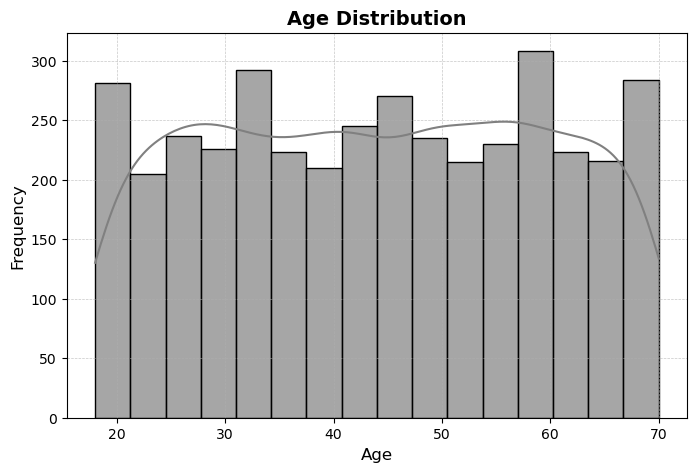

In [19]:
# Set the size of the figure
plt.figure(figsize=(8,5))
# Create the plot
sns.histplot(data=df, x='Age',alpha=0.7,edgecolor='black',color='grey',kde=True)
plt.title('Age Distribution',fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the plot as a PNG file
plt.savefig('age_distribution_.png',dpi=300,  transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Age has a uniform distribution which means that the store has a balanced customer base. The store can tailor its products and marketing to suit different shoppers by offering a mix of trendy and classic clothing styles ensures that all age groups find something they like. 

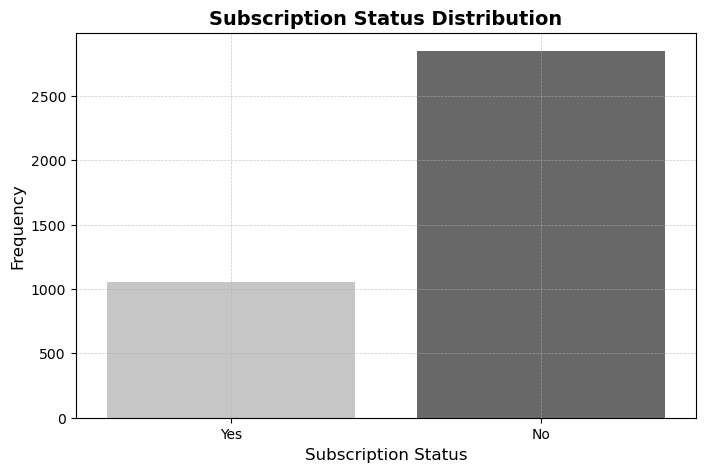

In [21]:
# Set the size of the figure
plt.figure(figsize=(8,5))
# Create the plot
sns.countplot(data=df, x='Subscription Status',palette='Greys',hue='Subscription Status')
plt.title('Subscription Status Distribution',fontsize=14, fontweight='bold')
plt.xlabel("Subscription Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Save the plot as a PNG file
plt.savefig('subscriptionstatus_distribution_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Over 2500 customers do not have an active subscription status, while about 1000 customers have an active subscription status. This suggests that a large portion of customers are not actively engaged with the store's subscription program. To improve retention, the store could offer exclusive benefits such as early access to new arrivals, free shipping, personalized shopping recommendations, or loyalty rewards for subscribers.


#### Multivariate Visualizations

In [25]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

### Purchasing Behavior & Trends

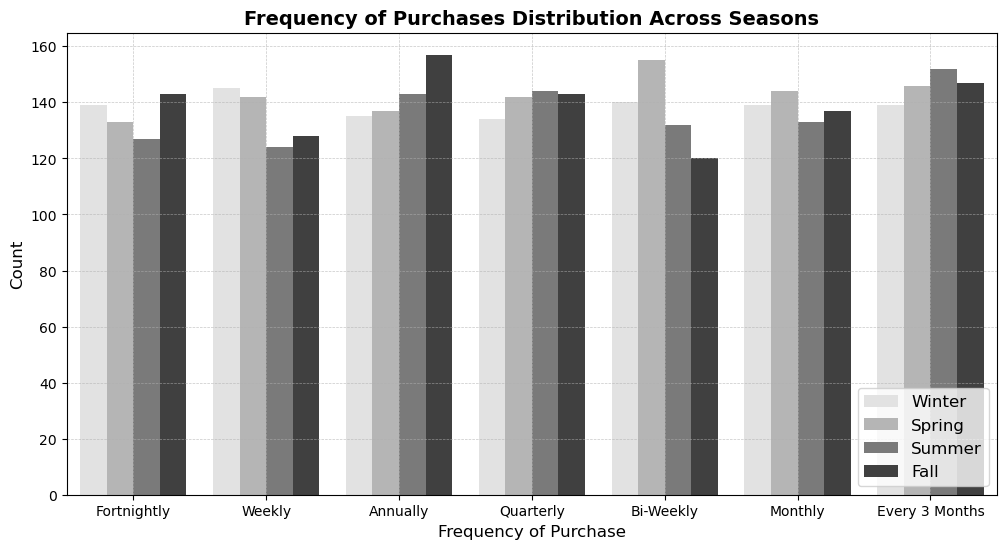

In [27]:
# Set the size of the figure
plt.figure(figsize=(12,6))
# Create the plot
sns.countplot(data=df, x='Frequency of Purchases',palette='Greys',hue='Season')
plt.title('Frequency of Purchases Distribution Across Seasons',fontsize=14, fontweight='bold')
plt.xlabel("Frequency of Purchase", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(loc='lower right',fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) 
# Save the plot as a PNG file
plt.savefig('Frequency of Purchases_Seasons.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* During Spring, the most common purchase frequencies are bi-weekly and monthly. In Fall, customers primarily make purchases annually and fortnightly. Quarterly purchases remain consistent across all seasons. In Summer, the most frequent purchase pattern is every three months, while in Winter, purchases are most commonly made weekly.Given these seasonal trends, targeted promotions and personalized marketing strategies should align with customer purchasing behaviors.

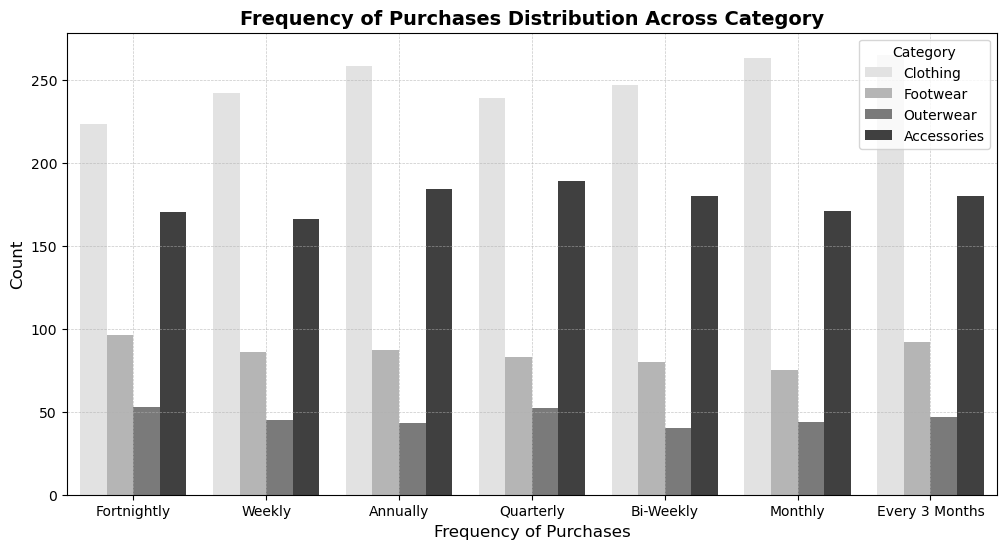

In [29]:
# Set the size of the figure
plt.figure(figsize=(12,6))
# Create the plot
sns.countplot(data=df, x='Frequency of Purchases',palette='Greys',hue='Category')
plt.title('Frequency of Purchases Distribution Across Category',fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Frequency of Purchases", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) 
# Save the plot as a PNG file
plt.savefig('Frequency of Purchases_Category.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Clothing is the most frequently purchased category, with over 200 purchases, followed closely by accessories, which exceed 150. In contrast, footwear and outerwear are the least popular, with fewer than 100 purchases. Outerwear, in particular, has the lowest purchase volume, nearing just 50.
To boost sales in the less popular categories, TrendStyle could consider targeted promotions, bundling offers, or seasonal discounts on footwear and outerwear to encourage more customer engagement.


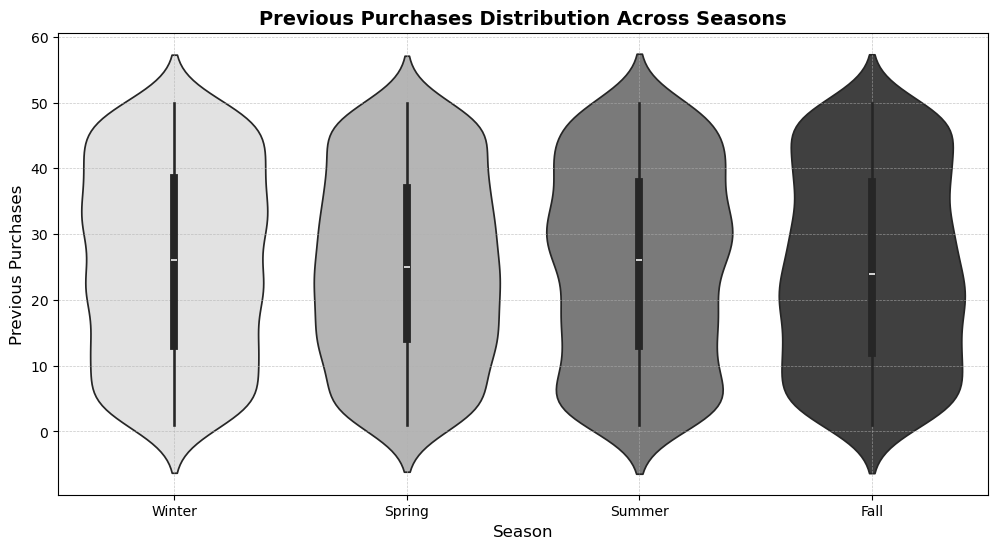

In [31]:
# Set the size of the figure
plt.figure(figsize=(12,6))
# Create the plot
sns.violinplot(data=df, x='Season',y='Previous Purchases',palette='Greys',hue='Season')
plt.title('Previous Purchases Distribution Across Seasons',fontsize=14, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Previous Purchases", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) 
# Save the plot as a PNG file
plt.savefig('Previous Purchases_Season.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Based on the violin plot, the distribution of previous purchases appears fairly consistent across the different seasons. Each violin has a similar shape, indicating that the frequency of past purchases does not vary significantly between seasons. The median values are also consistent, meaning that there are no drastic seasonal differences. The violins have slight variations in width suugesting that a small subset of customers may engage in more frequent purchases during specific periods.

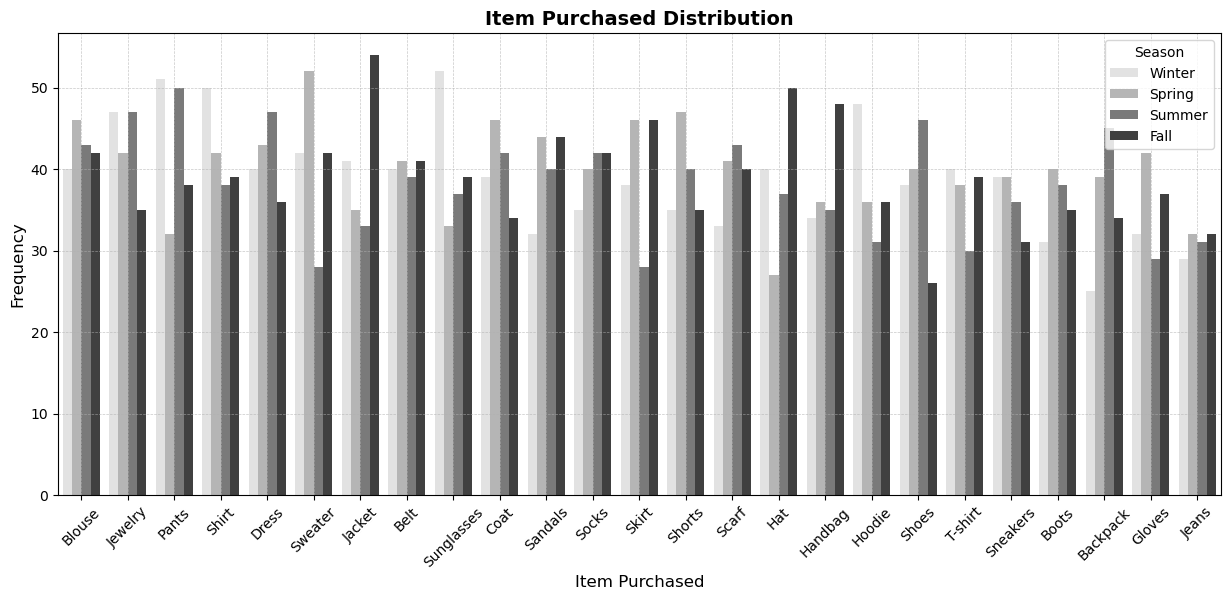

In [33]:
# Set the size of the figure
plt.figure(figsize=(15,6))
# Sort job roles by count
sorted_roles = df['Item Purchased'].value_counts().index
# Create the plot
sns.countplot(data=df, x='Item Purchased',hue='Season', palette='Greys',order=sorted_roles)
plt.title('Item Purchased Distribution',fontsize=14,fontweight='bold')
plt.ylabel("Frequency", fontsize=12)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel("Item Purchased", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Save the plot as a PNG file
plt.savefig('item_purchased.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* Jackets, handbags, and hats are the most purchased items during the fall season, while jeans are the least bought item across all seasons. In spring, the most popular items include sneakers, shorts, blouses, and gloves. During winter, hoodies, shirts, and sunglasses see the highest demand. In summer, dresses, backpacks, and sweaters are the top-selling items. TrendStyle could optimize inventory and marketing strategies by aligning promotions and stock levels with seasonal preferences. For instance, increasing visibility and discounts on jeans may help improve their sales, while ensuring sufficient stock of seasonal favorites can maximize revenue.

In [35]:
#Mapping
df['Frequency of Purchases_encoded'] = df['Frequency of Purchases'].map({'Every 3 Months': 1, 'Annually': 2, 'Quarterly': 3,'Monthly': 4,'Bi-Weekly': 5,'Fortnightly': 6,'Weekly': 7})
df['Category_encoded'] = df['Category'].map({'Clothing': 1, 'Accessories': 2,'Footwear': 3,'Outerwear': 4})
df['Gender_encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Discount Applied_encoded'] = df['Discount Applied'].map({'No': 0, 'Yes': 1})
df['Promo Code Used_encoded'] = df['Promo Code Used'].map({'No': 0, 'Yes': 1})
df['Subscription Status_encoded'] = df['Subscription Status'].map({'No': 0, 'Yes': 1})
df['Size_encoded'] = df['Size'].map({'M': 0, 'L': 1,'S': 2,'XL': 3})
df['Color_encoded'] = df['Color'].map({'Olive': 1, 'Yellow': 2, 'Silver': 3, 'Teal': 4, 'Green': 5, 'Black': 6, 'Cyan': 7, 
    'Violet': 8, 'Gray': 9, 'Maroon': 10, 'Orange': 11, 'Charcoal': 12, 'Pink': 13, 
    'Magenta': 14, 'Blue': 15, 'Purple': 16, 'Peach': 17, 'Red': 18, 'Beige': 19, 
    'Indigo': 20, 'Lavender': 21, 'Turquoise': 22, 'White': 23, 'Brown': 24, 'Gold': 25})
df['Season_encoded'] = df['Season'].map({'Spring': 1, 'Fall': 2,'Winter': 3,'Summer': 4})
df['Location_encoded'] = df['Location'].map({'Montana': 1, 'California': 2, 'Idaho': 3, 'Illinois': 4, 'Alabama': 5, 'Minnesota': 6, 'Nebraska': 7, 
    'New York': 8, 'Nevada': 9, 'Maryland': 10, 'Delaware': 11, 'Vermont': 12, 'Louisiana': 13, 
    'North Dakota': 14, 'Missouri': 15, 'West Virginia': 16, 'New Mexico': 17, 'Mississippi': 18, 
    'Indiana': 19, 'Georgia': 20, 'Kentucky': 21, 'Arkansas': 22, 'North Carolina': 23, 'Connecticut': 24, 
    'Virginia': 25, 'Ohio': 26, 'Tennessee': 27, 'Texas': 28, 'Maine': 29, 'South Carolina': 30, 
    'Colorado': 31, 'Oklahoma': 32, 'Wisconsin': 33, 'Oregon': 34, 'Pennsylvania': 35, 'Washington': 36, 
    'Michigan': 37, 'Alaska': 38, 'Massachusetts': 39, 'Wyoming': 40, 'Utah': 41, 'New Hampshire': 42, 
    'South Dakota': 43, 'Iowa': 44, 'Florida': 45, 'New Jersey': 46, 'Hawaii': 47, 'Arizona': 48, 
    'Kansas': 49, 'Rhode Island': 50})
df['Preferred Payment Method_encoded'] = df['Preferred Payment Method'].map({'PayPal': 1,'Credit Card': 2,'Cash': 3,'Debit Card': 4,'Venmo': 5,'Bank Transfer': 6})
df['Shipping Type_encoded'] = df['Shipping Type'].map({ 'Free Shipping': 1,'Standard': 2,'Store Pickup': 3,'Next Day Air': 4,'Express': 5,'2-Day Shipping': 6})
df['Item Purchased_encoded'] = df['Item Purchased'].map({'Blouse': 1, 'Jewelry': 2, 'Pants': 3, 'Shirt': 4, 'Dress': 5,
    'Sweater': 6, 'Jacket': 7, 'Belt': 8, 'Sunglasses': 9, 'Coat': 10,
    'Sandals': 11, 'Socks': 12, 'Skirt': 13, 'Shorts': 14, 'Scarf': 15,
    'Hat': 16, 'Handbag': 17, 'Hoodie': 18, 'Shoes': 19, 'T-shirt': 20,
    'Sneakers': 21, 'Boots': 22, 'Backpack': 23, 'Gloves': 24, 'Jeans': 25})
df['Payment Method_encoded'] = df['Payment Method'].map({ 'Credit Card': 1, 'Venmo': 2,'Cash': 3,'PayPal': 4,'Debit Card': 5,'Bank Transfer': 6})

## Customer Segmentation & Targeting

In [37]:
# Compute RFM metrics
rfm = df.groupby("Customer ID").agg({
    "Frequency of Purchases_encoded": "max", 
    "Previous Purchases": "sum",  
    "Purchase Amount (USD)": "sum"  
}).rename(columns={
    "Frequency of Purchases_encoded": "Recency",  # Using frequency as recency 
    "Previous Purchases": "Frequency",
    "Purchase Amount (USD)": "Monetary"
})

# Print RFM data
rfm.head()

Recency  Frequency  Monetary
Customer ID                              
1                  6         14        53
2                  6          2        64
3                  7         23        73
4                  7         49        90
5                  2         31        49

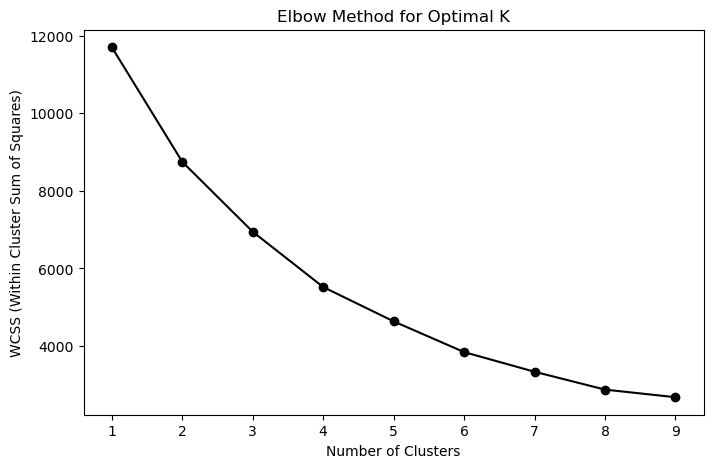

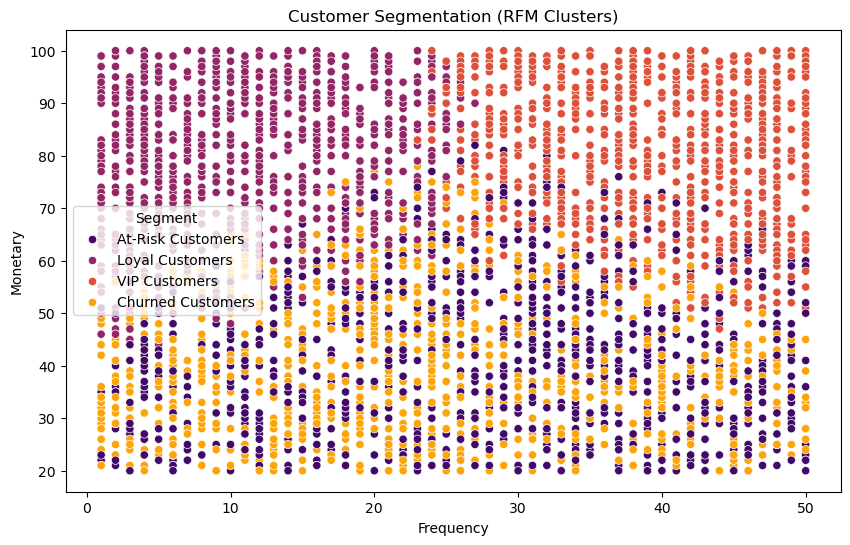

In [38]:
# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Determine the optimal number of clusters using the K Means Clustering
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker="o",color='black')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.savefig('Age_Purchase_Segmen.png',dpi=300, bbox_inches='tight')
plt.show()

# Apply K-Means with the optimal number of clusters (choose based on the elbow plot)
optimal_k = 4  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Define Customer Segments
segment_labels = {
    0: "VIP Customers",  
    1: "Loyal Customers",
    2: "At-Risk Customers",
    3: "Churned Customers"
}
rfm["Segment"] = rfm["Cluster"].map(segment_labels)

# Merge segmentation results back to the main dataset
df = df.merge(rfm[["Segment"]], left_on="Customer ID", right_index=True, how="left")

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Frequency", y="Monetary", hue="Segment", palette="inferno")
plt.title("Customer Segmentation (RFM Clusters)")
plt.savefig('rfmclusters.png',dpi=300, bbox_inches='tight')
plt.show()

* Based on the graph, the elbow appears around K=3 or K=4, meaning that segmenting the data into 3 or 4 clusters would likely be most effective. 
* VIP customers  are positioned in the upper-right, indicating high spending and frequent purchases.
* Loyal customers are also high in monetary value but may not purchase as frequently.
* At-risk customers and churned customers tend to have lower spending and less frequent purchases.
  
The segmentation provides valuable insights for retention strategies, such as targeting at-risk customers with promotions or personalized offers to prevent churn.

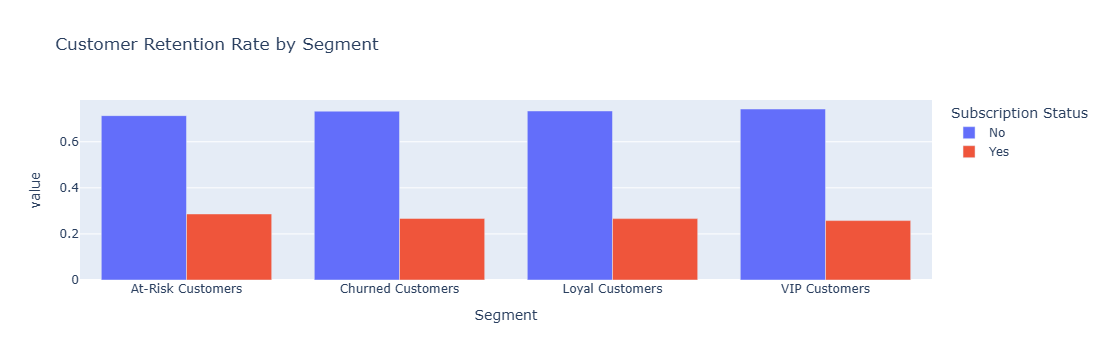

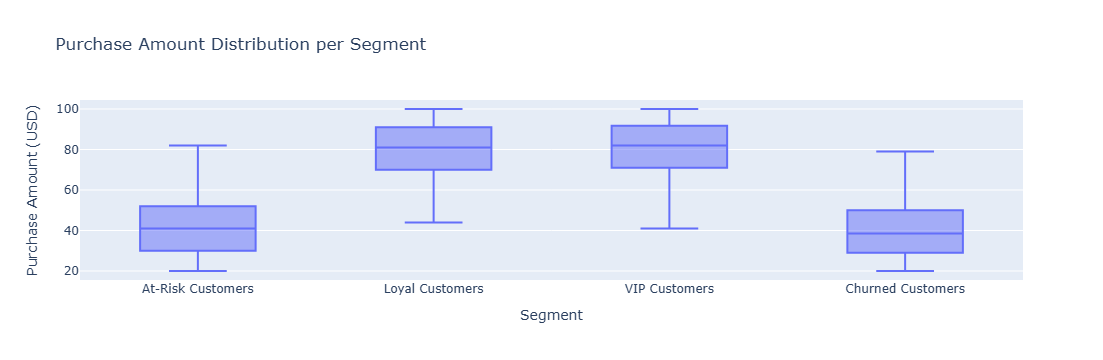

In [40]:
# Aggregate retention rates by segment
retention_summary = df.groupby("Segment")["Subscription Status"].value_counts(normalize=True).unstack()

# Create Retention Rate Bar Chart
fig = px.bar(retention_summary, barmode="group", title="Customer Retention Rate by Segment")
fig.write_image("retention_rate.png", scale=2)
fig.show()

# Visualize Purchase Behavior by Segment
fig2 = px.box(df, x="Segment", y="Purchase Amount (USD)",title="Purchase Amount Distribution per Segment")
fig2.write_image("purchase_behavior.png", scale=2)
fig2.show()

## Customer Retention and Purchase Behavior Analysis  

### 1. Customer Retention Rate by Segment  
The first visualization analyzes **customer retention rates** across different segments.  
- It calculates the proportion of **Active vs. Canceled subscriptions** for each segment.  
- The grouped bar chart helps identify **which segments have the highest retention rates** and **which ones are more likely to churn**.  

### 2. Purchase Amount Distribution per Segment  
The second visualization examines **purchase behavior** by segment using a box plot.  
- It displays the **median purchase amount**, **variability in spending**, and potential **outliers**.  
- This helps understand **which segments spend more and how their purchase amounts vary**.  

### Recommendation:  
To **improve retention**, focus on segments with **high churn rates** by offering **personalized or loyalty programs**. Additionally, encourage lower-spending segments to **increase their purchase amounts** through **targeted promotions**.  


### Identifying At-Risk Customer Segments: Demographic Insights on Churn

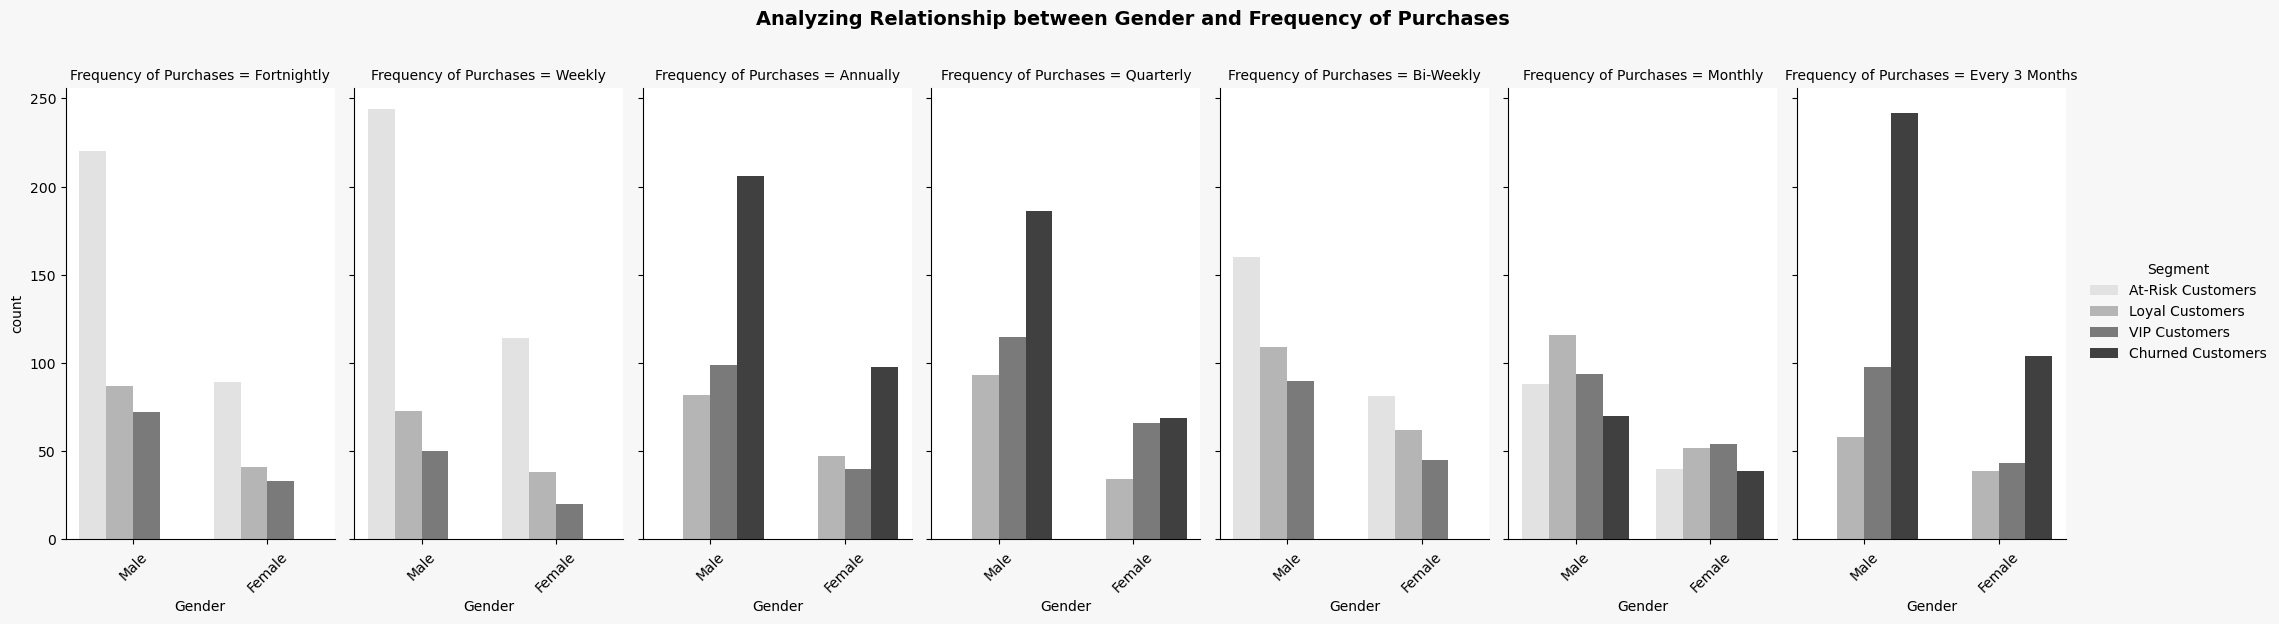

In [43]:
# Create a Clustered Bar Chart to visualize the relationship between Gender and Frequency of Purchases
g=sns.catplot(data=df, x='Gender', hue='Segment', col='Frequency of Purchases', kind='count', palette='Greys',height=6, aspect=0.5)
# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45)
# Set background color for the entire figure
g.figure.patch.set_facecolor('#f7f7f7')
g.fig.suptitle("Analyzing Relationship between Gender and Frequency of Purchases",fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.85) 
g.savefig('Gender_Frequency of Purchases.png',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* Male customers dominate in certain purchase frequency categories. In the fortnightly, bi-weekly, and weekly frequency categories, both male and female customers exhibit a similar trend, with over 200 at-risk customers in each. However, in the quarterly category, churned male customers are the highest. Additionally, the "every 3 months" and "annually" categories have the largest number of churned customers overall
* To improve retention, targeted engagement strategies should be implemented for quarterly, 3-month, and annual shoppers, especially male customers. Personalized promotions, loyalty rewards, or subscription-based incentives could encourage more frequent purchases and reduce churn.

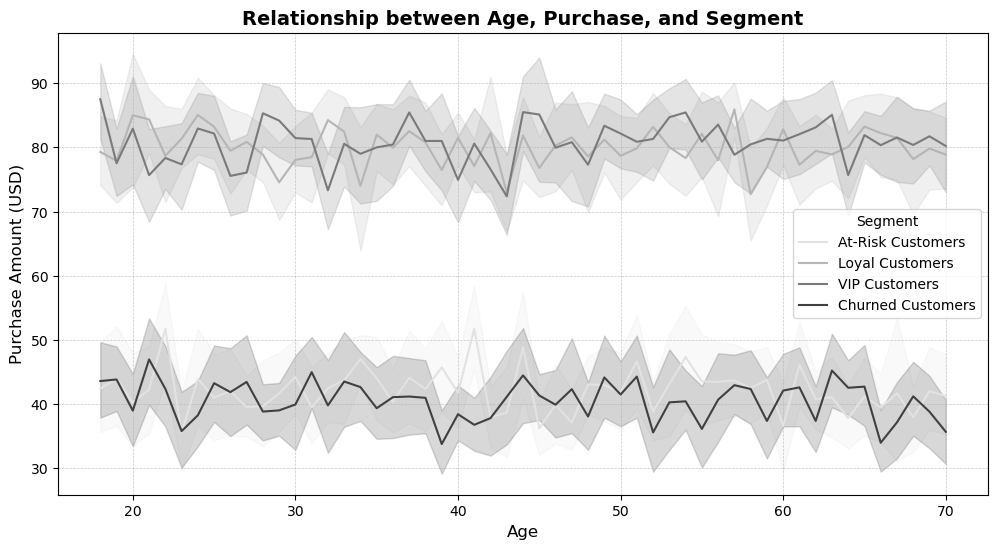

In [45]:
# Set the size of the figure
plt.figure(figsize=(12,6))
# Create a line plot to visualize the relationship between Age, Purchase, and Segment
sns.lineplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Segment', palette='Greys')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title("Relationship between Age, Purchase, and Segment",fontsize=14, fontweight='bold')
plt.savefig('Age_Purchase_Segment.png',dpi=300, bbox_inches='tight')
plt.show()

**VIP and Loyal Customers:**
These customers have higher purchase amounts (80–90 USD) across all ages.Their purchase behavior appears relatively stable, with some fluctuations.
**At-Risk and Churned Customers:**
These customers spend significantly less (40–50 USD).Their spending pattern fluctuates but remains consistently lower than VIPs and Loyal customers.

To improve customer retention, TrendStyle should engage at-risk and churned customers with personalized offers or discounts to boost retention.


In [47]:
# Define region mapping
region_mapping = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont",
                  "New Jersey", "New York", "Pennsylvania"],
    
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin",
                "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"],

    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "West Virginia",
              "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"],

    "West": ["Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada",
             "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"]
}

# Map locations to regions
def map_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region
    return "Other"  

df["Region"] = df["Location"].map(map_region)

# Display value counts per region
print(df["Region"].value_counts())


Region
South        1271
West         1018
Midwest       937
Northeast     674
Name: count, dtype: int64


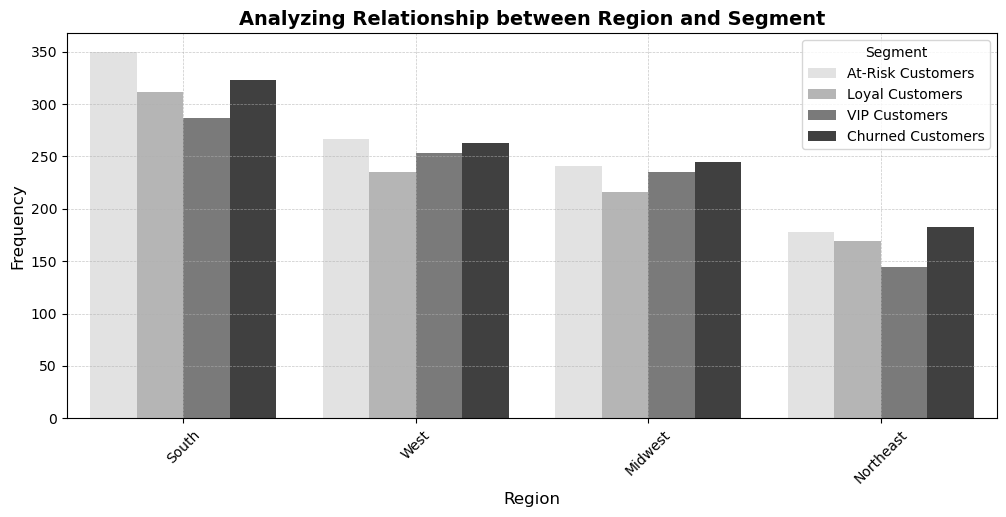

In [48]:
# Set the size of the figure
plt.figure(figsize=(12,5))
# Sort job roles by count
sorted_roles = df['Region'].value_counts().index
# Create the plot
sns.countplot(data=df, x='Region',hue='Segment', palette='Greys',order=sorted_roles)
plt.title('Analyzing Relationship between Region and Segment',fontsize=14,fontweight='bold')
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Save the plot as a PNG file
plt.savefig('Region_Segment_.png',dpi=300, transparent=True, bbox_inches='tight')
# Display the plot
plt.show()

* The South region has the largest customer base, followed by the West, Midwest, and Northeast. However, it also has the highest number of at-risk and churned customers, a trend that is consistent across all regions.
* To improve customer retention, targeted engagement strategies should be implemented in the South region, focusing on personalized offers, loyalty programs, and proactive customer support. Additionally, analyzing churn patterns in other regions can help tailor region-specific retention initiatives.

## Revenue & Value Analysis

In [51]:
# Separate customers who used discounts vs. those who didn't
discount_users = df[df["Discount Applied_encoded"] == 1]
non_discount_users = df[df["Discount Applied_encoded"] == 0]

# Compute Retention Rates
retained_discount_users = discount_users[discount_users["Subscription Status_encoded"] == 1]["Customer ID"].nunique()
retained_non_discount_users = non_discount_users[non_discount_users["Subscription Status_encoded"] == 0]["Customer ID"].nunique()

total_discount_users = discount_users["Customer ID"].nunique()
total_non_discount_users = non_discount_users["Customer ID"].nunique()

# Compute CRR, handling division by zero
crr_discount = (retained_discount_users / total_discount_users * 100) if total_discount_users > 0 else 0
crr_non_discount = (retained_non_discount_users / total_non_discount_users * 100) if total_non_discount_users > 0 else 0

# Ensure CRR values are scalar, not Series
print(f"Customer Retention Rate with Discount: {float(crr_discount):.2f}%")
print(f"Customer Retention Rate without Discount: {float(crr_non_discount):.2f}%")


Customer Retention Rate with Discount: 62.79%
Customer Retention Rate without Discount: 100.00%


Customers who received a discount had a retention rate of **62.79%**, while those who did not receive a discount had a **100% retention rate**. This suggests that discount users may be more **price-sensitive** and less likely to return without discount, whereas non-promo code users are more **loyal** and continue purchasing even without incentives. To improve retention among promo code users, the company could introduce a **loyalty program** or offer **personalized discounts** to encourage repeat purchases beyond the initial incentive.

In [53]:
# Separate customers who used promo code vs. those who didn't
promocode_users = df[df["Promo Code Used_encoded"] == 1]
non_promocode_users = df[df["Promo Code Used_encoded"] == 0]

# Compute Retention Rates
retained_promocode_users = promocode_users[promocode_users["Subscription Status_encoded"] == 1]["Customer ID"].nunique()
retained_non_promocode_users = non_promocode_users[non_promocode_users["Subscription Status_encoded"] == 0]["Customer ID"].nunique()

total_promocode_users = promocode_users["Customer ID"].nunique()
total_non_promocode_users = non_promocode_users["Customer ID"].nunique()

# Compute CRR, handling division by zero
crr_promocode = (retained_promocode_users / total_promocode_users * 100) if total_promocode_users > 0 else 0
crr_non_promocode = (retained_non_promocode_users / total_non_promocode_users * 100) if total_non_promocode_users > 0 else 0

# Ensure CRR values are scalar, not Series
print(f"Customer Retention Rate with Promo Code: {float(crr_promocode):.2f}%")
print(f"Customer Retention Rate without Promo Code: {float(crr_non_promocode):.2f}%")

Customer Retention Rate with Promo Code: 62.79%
Customer Retention Rate without Promo Code: 100.00%


* Customers who used a promo code had a retention rate of **62.79%**, while those who did not use a promo code had a **100% retention rate**. This suggests that promo code users may be more **price-sensitive** and less likely to return without discounts, whereas non-promo code users are more **loyal** and continue purchasing even without incentives. To improve retention among promo code users, the company could introduce a **loyalty program** or offer **personalized discounts** to encourage repeat purchases beyond the initial incentive.

In [55]:
print(df["Promo Code Used_encoded"].unique())
print(df["Promo Code Used_encoded"].value_counts())

[1 0]
Promo Code Used_encoded
0    2223
1    1677
Name: count, dtype: int64


In [56]:
# Separate customers who used discounts vs. those who didn't
discount_users = df[df["Discount Applied_encoded"] == 1]
non_discount_users = df[df["Discount Applied_encoded"] == 0]

# Function to compute CLV
def compute_clv(group):
    avg_purchase_value = group["Purchase Amount (USD)"].mean()  # Average spending per purchase
    purchase_frequency = group["Frequency of Purchases_encoded"].count() / group["Customer ID"].nunique()  # Purchases per customer
    customer_lifespan = group["Previous Purchases"].mean()  # Average number of past purchases per customer
    return avg_purchase_value * purchase_frequency * customer_lifespan

# Compute CLV for both groups
clv_discount_users = compute_clv(discount_users)
clv_non_discount_users = compute_clv(non_discount_users)


# Print CLV results
print(f"Customer Lifetime Value with Discounts: ${clv_discount_users:.2f}")
print(f"Customer Lifetime Value without Discounts: ${clv_non_discount_users:.2f}")


Customer Lifetime Value with Discounts: $1526.02
Customer Lifetime Value without Discounts: $1506.64


Customers who received discounts had a slightly higher **Customer Lifetime Value (CLV) of 1526.02**, compared to **1506.64** for those who did not receive discounts. This indicates that discounts may have a **positive impact** on overall customer spending, encouraging more purchases over time. However, the difference is relatively small, suggesting that while discounts can drive short-term sales, they may not significantly boost long-term value. A balanced approach, such as **targeted discounts for high-value customers** or **reward-based incentives**, could help maximize profitability while maintaining strong customer retention.

In [58]:
# Separate customers who used Promo Code vs. those who didn't
promocode_users = df[df["Promo Code Used_encoded"] == 1]
non_promocode_users = df[df["Promo Code Used_encoded"] == 0]

# Function to compute CLV
def compute_clv(group):
    avg_purchase_value = group["Purchase Amount (USD)"].mean()  # Average spending per purchase
    purchase_frequency = group["Frequency of Purchases_encoded"].count() / group["Customer ID"].nunique()  # Purchases per customer
    customer_lifespan = group["Previous Purchases"].mean()  # Average number of past purchases per customer
    return avg_purchase_value * purchase_frequency * customer_lifespan

# Compute CLV for both groups
clv_promocode_users = compute_clv(promocode_users)
clv_non_promocode_users = compute_clv(non_promocode_users)

# Print CLV results
print(f"Customer Lifetime Value with Promo Code Used: ${clv_promocode_users:.2f}")
print(f"Customer Lifetime Value without Promo Code Not Used: ${clv_non_promocode_users:.2f}")

Customer Lifetime Value with Promo Code Used: $1526.02
Customer Lifetime Value without Promo Code Not Used: $1506.64


Customers who used a promo code had a slightly higher **Customer Lifetime Value (CLV) of 1526.02**, compared to **1506.64** for those who did not use a promo code. This suggests that promo codes may encourage higher spending and repeat purchases. However, the difference is relatively small, indicating that while promo codes can drive sales, their long-term impact on customer value may be limited. A more strategic approach, such as offering promo codes **exclusively to high-value or at-risk customers**, could help enhance retention and profitability without unnecessary revenue loss.

In [60]:
# Add computed CLV values back to the dataset
df.loc[df["Promo Code Used_encoded"] == 1, "CLV"] = clv_promocode_users
df.loc[df["Promo Code Used_encoded"] == 0, "CLV"] = clv_non_promocode_users

# Display the first few rows to verify CLV column
print(df[["Customer ID", "Promo Code Used_encoded", "CLV"]].head())


   Customer ID  Promo Code Used_encoded          CLV
0            1                        1  1526.020704
1            2                        1  1526.020704
2            3                        1  1526.020704
3            4                        1  1526.020704
4            5                        1  1526.020704


In [61]:
df['Segment_encoded'] = df['Segment'].map({'VIP Customers': 0, 'Loyal Customers': 1,'At-Risk Customers': 2,'Churned Customers': 3})
df["CLV_encoded"] = df["CLV"].apply(lambda x: 0 if x < 1516 else 1)

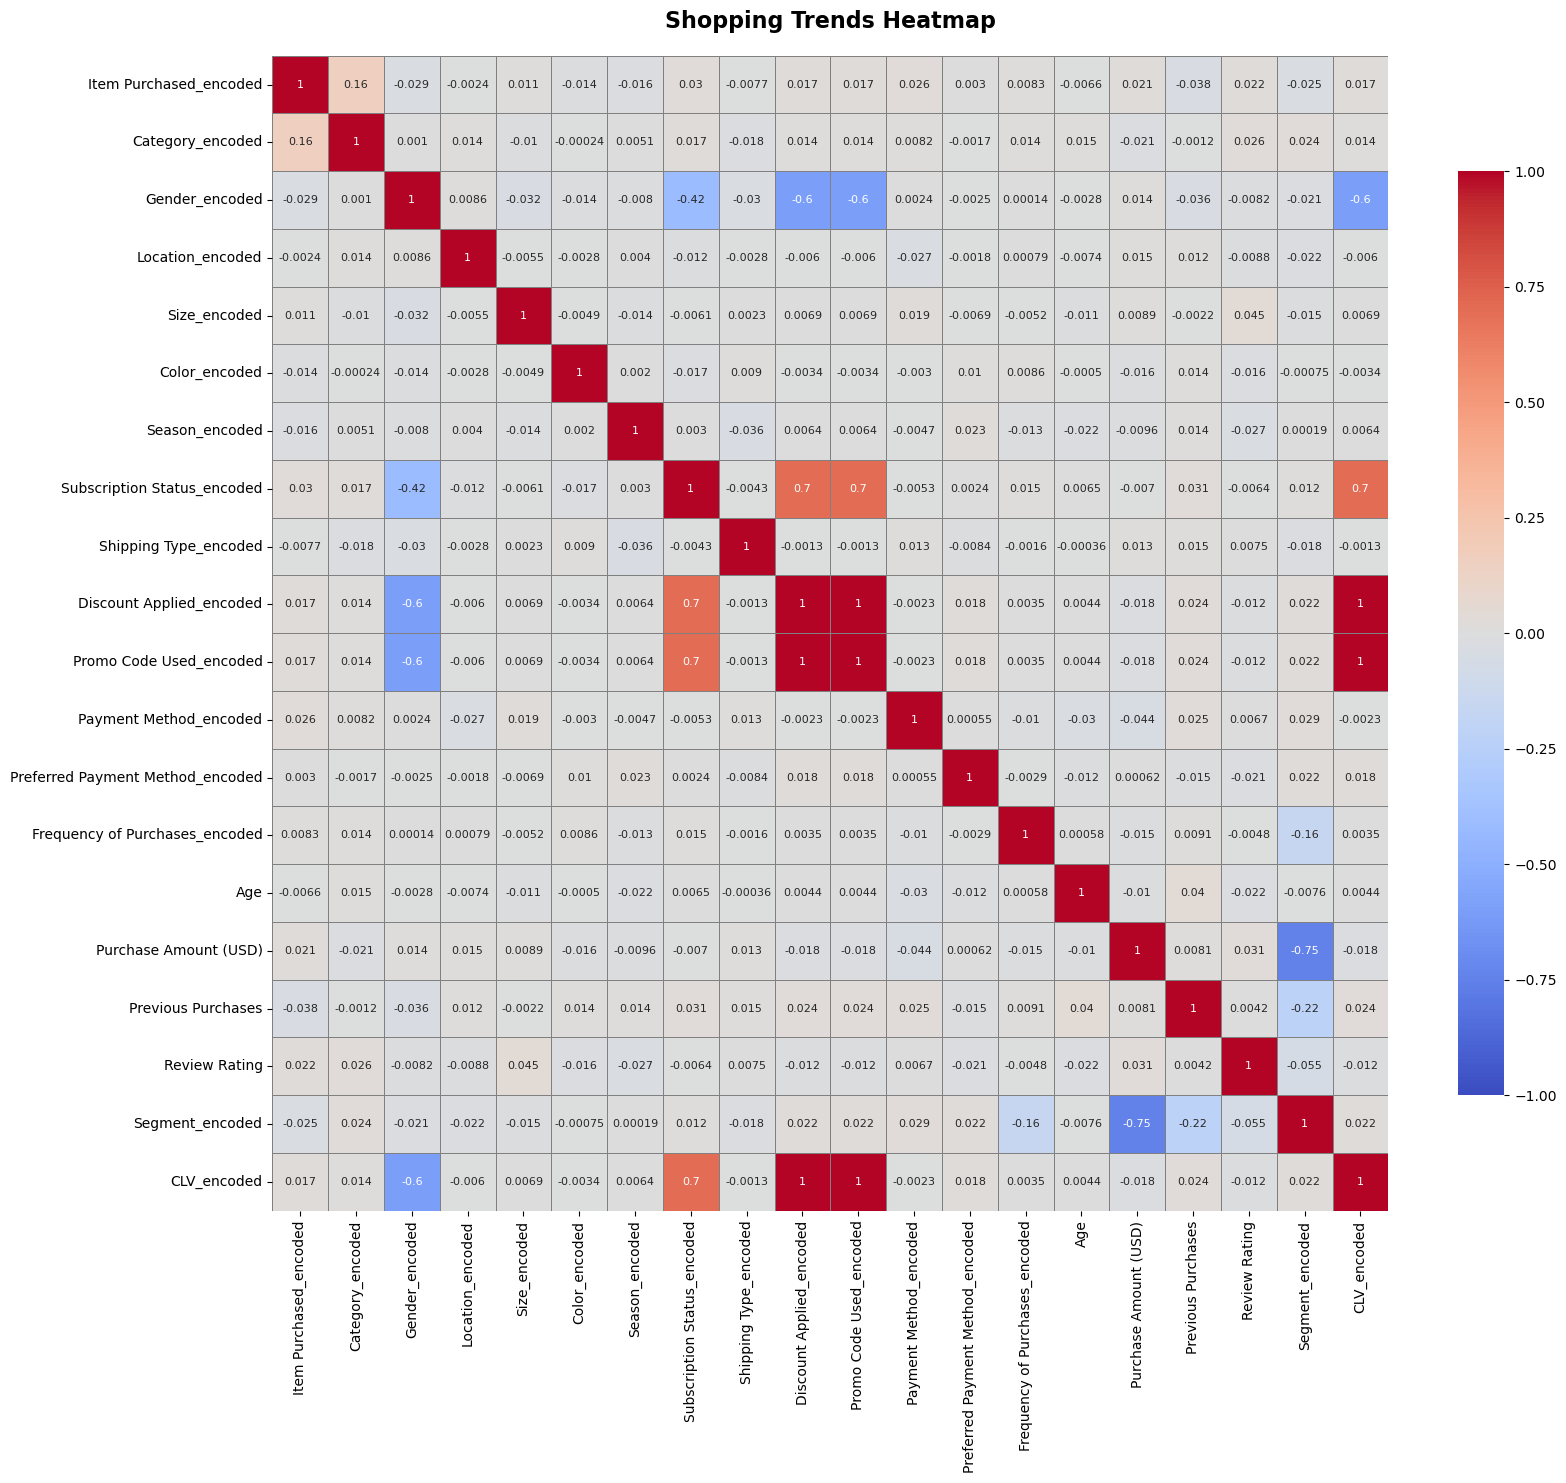

In [62]:
# Set the size of the figure
plt.figure(figsize=((18,15)))
# Select relevant columns for analysis
columns=df[['Item Purchased_encoded','Category_encoded','Gender_encoded','Location_encoded','Size_encoded','Color_encoded','Season_encoded','Subscription Status_encoded','Shipping Type_encoded','Discount Applied_encoded','Promo Code Used_encoded','Payment Method_encoded','Preferred Payment Method_encoded','Frequency of Purchases_encoded','Age','Purchase Amount (USD)','Previous Purchases','Review Rating','Segment_encoded','CLV_encoded']]
# Calculate the correlation matrix for the selected columns
matrix = columns.corr()
# Plot the heatmap with annotations and a 'coolwarm' color palette
sns.heatmap(matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1,linewidths=0.5,linecolor='gray',annot_kws={"size": 8},cbar_kws={"shrink": 0.8})
# Add a title to the heatmap
plt.title("Shopping Trends Heatmap",fontsize=16, fontweight='bold', pad=20)
# Save the heatmap as a PNG file
plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight')
# Display the heatmap
plt.show()

### Segment_encoded Correlations
**Purchase Amounthas a strong negative correlation (-0.75)** with Segment_encoded, indicating that higher purchase amounts are associated with lower segment values.
**Frequency of Purchases (-0.16) and Previous Purchases (-0.22)** show weak negative correlations with Subscription Status_encoded, suggesting that frequent or repeat purchases have a minor influence on segmentation.
**Review Rating (0.055)** has a very weak negative correlation with Subscription Status_encoded, indicating that customer ratings have little impact on customer segmentation.
### CLV_encoded Correlations
**Discount Applied_encoded and Promo Code Used_encoded** are strongly correlated with each other and with CLV, suggesting the presence of multicollinearity.
**Subscription Status_encoded has a strong positive correlation (0.7)** with CLV_encoded, meaning customers with an active subscription tend to have a higher CLV.
**Gender_encoded has a strong negative correlation (-0.6) with CLV_encoded**, suggesting that gender plays a significant role in customer lifetime value.
**Item Purchased_encoded (0.017), Preferred Payment Method_encoded (0.018), Previous Purchases (0.024), and Category_encoded (0.014)** have weak positive correlations with CLV_encoded, indicating a minimal but positive impact on CLV.
**Purchase Amount (-0.018) and Review Rating (-0.012)** have weak negative correlations with CLV, meaning they slightly reduce customer lifetime value


## Predicting Customer Churn

In [65]:
# Identify the target variable and features
X=df[['Purchase Amount (USD)','Previous Purchases','Frequency of Purchases_encoded','Review Rating']]
y=df['Segment_encoded']

In [66]:
#Standardize the data using Standard Scaler
standard_scaler=StandardScaler()
X=standard_scaler.fit_transform(X)

In [67]:
#Split the data into training and testing sets (e.g., 80-20 split).
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

### Model Selection

### Decision Tree Model

In [70]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
#Make predictions
y_pred=dt.predict(X_test)
#Calculate the metrics and print the results
accuracy_dt=accuracy_score(y_test,y_pred)
classification_dt=classification_report(y_test,y_pred)
matrix_dt= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_dt)
print("Classification Report:", classification_dt)
print("Confusion Matrix\n", matrix_dt)

Accuracy Score: 0.9705128205128205
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96       167
           1       0.97      0.97      0.97       171
           2       0.98      0.96      0.97       214
           3       0.97      0.99      0.98       228

    accuracy                           0.97       780
   macro avg       0.97      0.97      0.97       780
weighted avg       0.97      0.97      0.97       780

Confusion Matrix
 [[160   0   4   3]
 [  0 166   0   5]
 [  4   5 205   0]
 [  1   1   0 226]]


## Results:
##### Accuracy:
- 97% of predictions are correct (either class 0,1,2, or 3). It shows that the model is a good fit.
##### Precision:
- For class 0 (VIP Customers): 97% of the predictions made as 0 were correct.
- For class 1 (Loyal Customers): 97% of the predictions made as 1 were correct.
- For class 2 (At-Risk Customers): 98% of the predictions made as 2 were correct.
- For class 3 (Churned Customers): 97% of the predictions made as 3 were correct.
##### Recall:
- For class 0 : 96% of actual 0 cases were correctly predicted.
- For class 1 : 97% of actual 0 cases were correctly predicted.
- For class 2 : 96% of actual 1 cases were correctly predicted.
- For class 3 : 99% of actual 2 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 0: 0.96 - Srong performance for this class.
- Class 1: 0.97 - Strong performance for this class.
- Class 2: 0.97 - Strong performance for this class.
- Class 3: 0.98 - Strong performance for this class.
##### Confusion Matrix:
- Class 0 : 160 were correctly classified, while 4 was misclassified as Class 2 and 3 as Class 3.
- Class 1 : 166 were correctly classified, while 5 was misclassified as Class 3.
- Class 2 : 205 were correctly classified, with 4 misclassified as Class 0 and 5 as Class 1.
- Class 3 : 226 were correctly classified, but 1 was misclassified  as Class 0 and 1 as Class 1.

In [72]:
#Initialize and train the model
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
#Make predictions
y_pred=rf.predict(X_test)
#Calculate the metrics and print the results
accuracy_rf=accuracy_score(y_test,y_pred)
classification_rf=classification_report(y_test,y_pred)
matrix_rf= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_rf)
print("Classification Report:", classification_rf )
print("Confusion Matrix\n", matrix_rf)

Accuracy Score: 0.9794871794871794
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       167
           1       0.98      0.98      0.98       171
           2       1.00      0.97      0.98       214
           3       0.99      0.98      0.98       228

    accuracy                           0.98       780
   macro avg       0.98      0.98      0.98       780
weighted avg       0.98      0.98      0.98       780

Confusion Matrix
 [[165   1   1   0]
 [  0 168   0   3]
 [  4   2 208   0]
 [  5   0   0 223]]


## Results:
##### Accuracy:
- 98% of predictions are correct (either class 0,1,2, or 3). It shows that the model is a good fit.
##### Precision:
- For class 0 (VIP Customers): 95% of the predictions made as 0 were correct.
- For class 1 (Loyal Customers): 98% of the predictions made as 1 were correct.
- For class 2 (At-Risk Customers): 100% of the predictions made as 2 were correct.
- For class 3 (Churned Customers): 99% of the predictions made as 3 were correct.
##### Recall:
- For class 0 : 99% of actual 0 cases were correctly predicted.
- For class 1 : 98% of actual 0 cases were correctly predicted.
- For class 2 : 97% of actual 1 cases were correctly predicted.
- For class 3 : 98% of actual 2 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 0: 0.97 - Srong performance for this class.
- Class 1: 0.98 - Strong performance for this class.
- Class 2: 0.98 - Strong performance for this class.
- Class 3: 0.98 - Strong performance for this class.
##### Confusion Matrix:
- Class 0 : 165 were correctly classified, while 1 was misclassified as Class 2 and 1 as Class 3.
- Class 1 : 168 were correctly classified, while 3 was misclassified as Class 3.
- Class 2 : 208 were correctly classified, with 4 misclassified as Class 0 and 2 as Class 1.
- Class 3 : 223 were correctly classified, but 5 was misclassified  as Class 0.

In [74]:
#Initialize and train the model
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
#Make predictions
y_pred=gb.predict(X_test)
#Calculate the metrics and print the results
accuracy_gb=accuracy_score(y_test,y_pred)

classification_gb=classification_report(y_test,y_pred)
matrix_gb= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_gb)
print("Classification Report:", classification_gb )
print("Confusion Matrix\n", matrix_gb)

Accuracy Score: 0.985897435897436
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       167
           1       0.98      0.98      0.98       171
           2       1.00      0.98      0.99       214
           3       0.99      1.00      0.99       228

    accuracy                           0.99       780
   macro avg       0.98      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

Confusion Matrix
 [[165   2   0   0]
 [  1 167   0   3]
 [  2   2 210   0]
 [  1   0   0 227]]


## Results:
##### Accuracy:
- 99% of predictions are correct (either class 0,1,2, or 3). It shows that the model is a good fit.
##### Precision:
- For class 0 (VIP Customers): 98% of the predictions made as 0 were correct.
- For class 1 (Loyal Customers): 98% of the predictions made as 1 were correct.
- For class 2 (At-Risk Customers): 100% of the predictions made as 2 were correct.
- For class 3 (Churned Customers): 99% of the predictions made as 3 were correct.
##### Recall:
- For class 0 : 99% of actual 0 cases were correctly predicted.
- For class 1 : 98% of actual 0 cases were correctly predicted.
- For class 2 : 98% of actual 1 cases were correctly predicted.
- For class 3 : 100% of actual 2 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 0: 0.98 - Srong performance for this class.
- Class 1: 0.98 - Strong performance for this class.
- Class 2: 0.99 - Strong performance for this class.
- Class 3: 0.99 - Strong performance for this class.
##### Confusion Matrix:
- Class 0 : 165 were correctly classified, while 2 was misclassified as Class 1.
- Class 1 : 167 were correctly classified, while 1 was misclassified as Class 0 and 3 as Class 3.
- Class 2 : 210 were correctly classified, with 2 misclassified as Class 0 and 2 as Class 1.
- Class 3 : 227 were correctly classified, but 1 was misclassified  as Class 0.

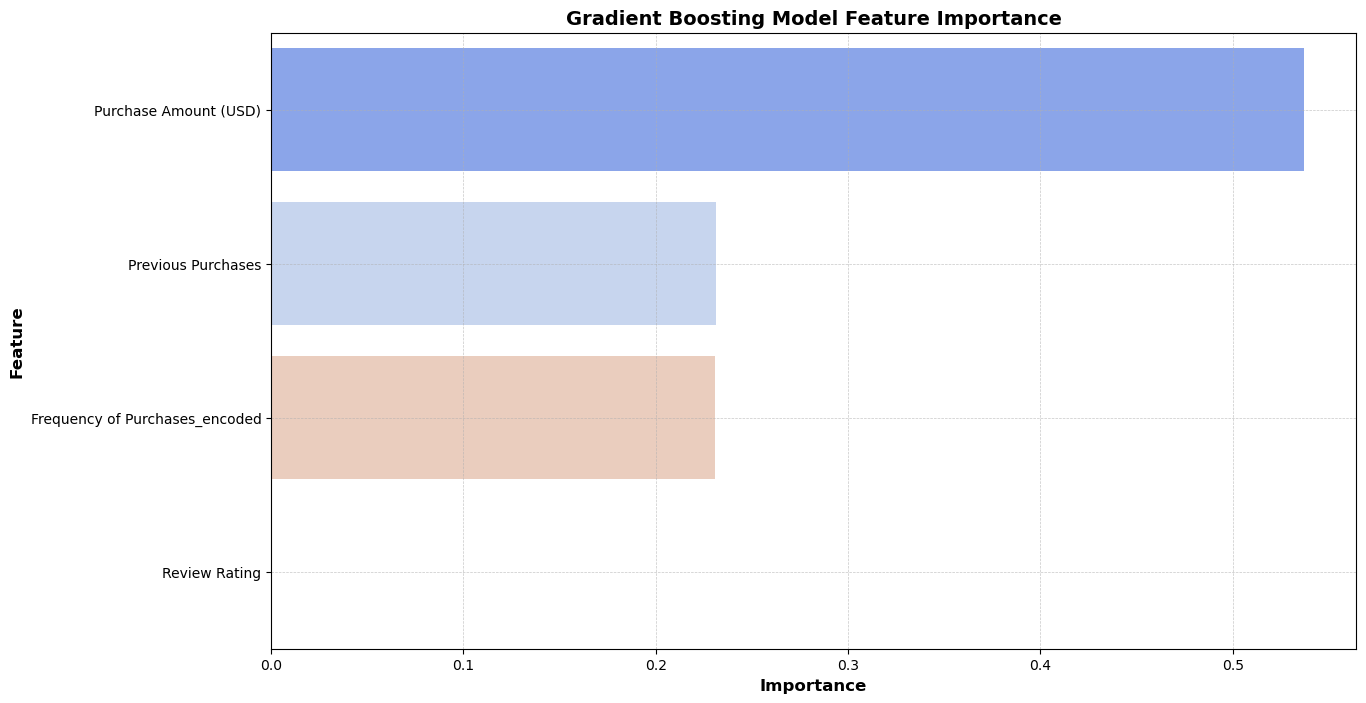

In [76]:
# Calculate and display the importance of eachr feature based on gradient boosting coefficients
features = ['Purchase Amount (USD)','Previous Purchases','Frequency of Purchases_encoded','Review Rating']
#Get feature importances
importance_df = pd.DataFrame({
    'feature': features,
    'importance': gb.feature_importances_
}).sort_values(by='importance', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))
# Plot with a blue-green palette
sns.barplot(x='importance', y='feature', data=importance_df, palette='coolwarm', hue='feature', legend=False)
plt.xlabel("Importance", fontsize=12,fontweight='bold')
plt.ylabel("Feature", fontsize=12,fontweight='bold')
# Add grid and style tweaks for depth
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title("Gradient Boosting Model Feature Importance", fontsize=14, fontweight='bold')
plt.savefig('feature_importance_barplot.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

* The most significant factor contributing to customer churn is purchase amount, as it has the highest importance level. This is followed by previous purchases and purchase frequency, indicating that spending behavior and shopping habits play a crucial role in customer retention.
* To reduce churn, personalized discounts and loyalty programs can be introduced for customers with declining purchase amounts or frequency. Additionally, targeted engagement strategies, such as exclusive promotions or reminders, can help retain high-value customers.

In [78]:
#Save and download the model in pkl format
joblib.dump (gb, 'gb.pkl')
print("Model saved successfully as gb.pkl")


Model saved successfully as gb.pkl


### Customer Lifetime Prediction Model

In [80]:
# Identify the target variable and features
X_clv=df[['Gender_encoded','Item Purchased_encoded','Category_encoded','Subscription Status_encoded','Preferred Payment Method_encoded','Purchase Amount (USD)','Previous Purchases','Review Rating']]
y_clv=df['CLV_encoded']

In [81]:
#Standardize the data using Standard Scaler
standard_scaler=StandardScaler()
X_clv=standard_scaler.fit_transform(X_clv)

In [82]:
#Split the data into training and testing sets (e.g., 80-20 split).
X_train, X_test, y_train,y_test=train_test_split(X_clv,y_clv, test_size=0.2, random_state=42)

### Model Selection

### Logistic Regression Model

In [85]:
lr_clv=LogisticRegression()
lr_clv.fit(X_train, y_train)
#Make predictions
y_pred=lr_clv.predict(X_test)
#Calculate the metrics and print the results
accuracy_lr=accuracy_score(y_test,y_pred)
classification_lr=classification_report(y_test,y_pred)
matrix_lr= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_lr)
print("Classification Report:", classification_lr)
print("Confusion Matrix\n", matrix_lr)

Accuracy Score: 0.8256410256410256
Classification Report:               precision    recall  f1-score   support

           0       0.76      1.00      0.86       422
           1       1.00      0.62      0.77       358

    accuracy                           0.83       780
   macro avg       0.88      0.81      0.81       780
weighted avg       0.87      0.83      0.82       780

Confusion Matrix
 [[422   0]
 [136 222]]


## Results:
##### Accuracy 
- 83% of predictions are correct (either class 0 or 1). It shows that the model is a good fit.
##### Precision:
- For class 0 (CLV Value 1506): 76% of the predictions made as 0 were correct.
- For class 1 (CLV Value 1526): 100% of the predictions made as 1 were correct.
##### Recall:
- For class 0 : 100% of actual 0 cases were correctly predicted.
- For class 1 : 62% of actual 0 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 0: 0.86 - Good performance for this class.
- Class 1: 0.77 - Moderate performance for this class.
- ##### Confusion Matrix:
- Class 0 : 422 were correctly classified.
- Class 1 : 222 were correctly classified, while 136 was misclassified as Class 0.

In [87]:
#Save and download the model in pkl format
joblib.dump (lr_clv, 'lr_cv.pkl')
print("Model saved successfully as lr_cv.pkl")


Model saved successfully as lr_cv.pkl


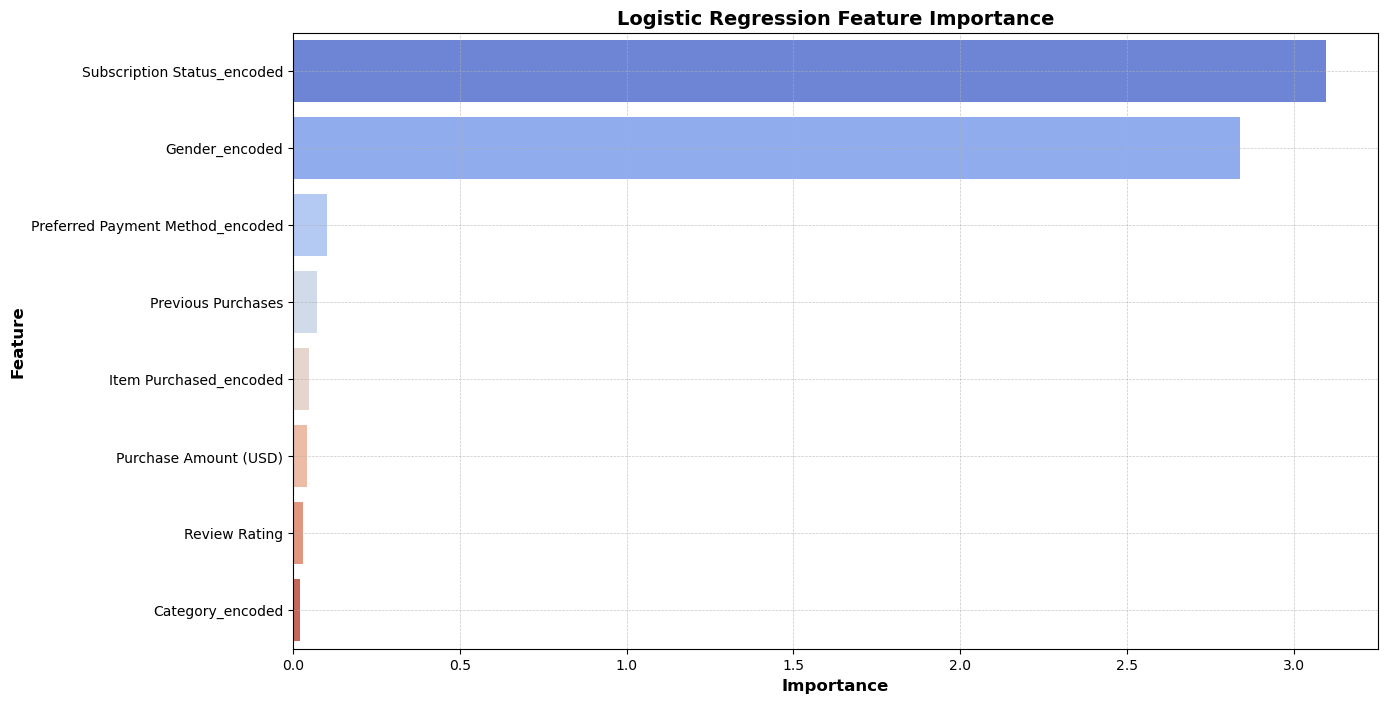

In [88]:
# Ensure the model is trained
if hasattr(lr_clv, "coef_"):
    feature_importance = abs(lr_clv.coef_[0])  # Take absolute values of coefficients
else:
    raise ValueError("Model has not been trained or does not support coefficients.")

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'feature': ['Gender_encoded','Item Purchased_encoded','Category_encoded','Subscription Status_encoded','Preferred Payment Method_encoded','Purchase Amount (USD)','Previous Purchases','Review Rating'],
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))
# Plot with a cool warm palette
sns.barplot(x='importance', y='feature', data=importance_df, palette='coolwarm',hue='feature')
plt.xlabel("Importance", fontsize=12, fontweight='bold')
plt.ylabel("Feature", fontsize=12, fontweight='bold')
# Add grid and style tweaks for depth
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title("Logistic Regression Feature Importance", fontsize=14, fontweight='bold')
plt.savefig('feature_importance_barplot.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


* The most influential factor in predicting Customer Lifetime Value (CLV) is Subscription Status, followed closely by Gender. Other features have a relatively minor impact on CLV.
* To maximize CLV, the company should focus on enhancing subscription benefits and retention strategies. Additionally, understanding gender-based purchasing behaviors can help tailor marketing campaigns for improved customer engagement and long-term value.

In [90]:
#Initialize and train the model
gb_clv=GradientBoostingClassifier(random_state=42)
gb_clv.fit(X_train,y_train)
#Make predictions
y_pred=gb_clv.predict(X_test)
#Calculate the metrics and print the results
accuracy_gb=accuracy_score(y_test,y_pred)

classification_gb=classification_report(y_test,y_pred)
matrix_gb= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_gb)
print("Classification Report:", classification_gb )
print("Confusion Matrix\n", matrix_gb)

Accuracy Score: 0.8051282051282052
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.94      0.84       422
           1       0.90      0.65      0.75       358

    accuracy                           0.81       780
   macro avg       0.83      0.79      0.80       780
weighted avg       0.82      0.81      0.80       780

Confusion Matrix
 [[395  27]
 [125 233]]


## Results:
##### Accuracy 
- 80% of predictions are correct (either class 0 or 1). It shows that the model is a good fit.
##### Precision:
- For class 0 (CLV Value 1506): 76% of the predictions made as 0 were correct.
- For class 1 (CLV Value 1526): 90% of the predictions made as 1 were correct.
##### Recall:
- For class 0 : 94% of actual 0 cases were correctly predicted.
- For class 1 : 65% of actual 0 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 0: 0.84 - Good performance for this class.
- Class 1: 0.75 - Moderate performance for this class.
- ##### Confusion Matrix:
- Class 0 : 395 were correctly classified, while 27 was misclassified as Class 1.
- Class 1 : 233 were correctly classified, while 125 was misclassified as Class 0.

In [92]:
#Initialize and train the model
xgb_clv=XGBClassifier(random_state=42)
xgb_clv.fit(X_train,y_train)
#Make predictions
y_pred=xgb_clv.predict(X_test)
#Calculate the metrics and print the results
accuracy_xgb=accuracy_score(y_test,y_pred)
classification_xgb=classification_report(y_test,y_pred)
matrix_xgb= confusion_matrix(y_test, y_pred)
print("Accuracy Score:", accuracy_xgb)
print("Classification Report:", classification_xgb )
print("Confusion Matrix\n", matrix_xgb)

Accuracy Score: 0.8128205128205128
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.85      0.83       422
           1       0.81      0.77      0.79       358

    accuracy                           0.81       780
   macro avg       0.81      0.81      0.81       780
weighted avg       0.81      0.81      0.81       780

Confusion Matrix
 [[357  65]
 [ 81 277]]


## Results:
##### Accuracy 
- 80% of predictions are correct (either class 0 or 1). It shows that the model is a good fit.
##### Precision:
- For class 0 (CLV Value 1506): 82% of the predictions made as 0 were correct.
- For class 1 (CLV Value 1526): 81% of the predictions made as 1 were correct.
##### Recall:
- For class 0 : 85% of actual 0 cases were correctly predicted.
- For class 1 : 77% of actual 0 cases were correctly predicted.
##### F1-Score:
- A harmonic mean of precision and recall, reflecting the balance between false positives and false negatives:
- Class 0: 0.83 - Good performance for this class.
- Class 1: 0.79 - Moderate performance for this class.
- ##### Confusion Matrix:
- Class 0 : 357 were correctly classified, while 65 was misclassified as Class 1.
- Class 1 : 277 were correctly classified, while 81 was misclassified as Class 0.

## Recommendations
- **1. Reward At-Risk Customers**
By offering special discounts or early access to new collections and creating a loyalty program with exclusive rewards. Customers who haven't shopped in a while may need an extra push to return. Providing personalized discounts or early access to new collections can rekindle their interest. 
- **2. Improve Subscription Perks**
Adding benefits like free shipping, exclusive discounts, or VIP support. Customers are more likely to maintain their subscriptions if they see added value. Offering perks such as free shipping, members-only discounts, or priority customer support can enhance the subscription experience and encourage long-term commitment.
- **3. Win Back Lost Customer**
By using limited-time discounts to create urgency. Customers who have stopped shopping might return with the right incentive. Sending personalized re-engagement emails featuring tailored offers can reignite their interest. Limited-time discounts can also create urgency and encourage them to make a purchase.
- **4. Make Payments Easier**
Offer flexible payment options like Buy Now, Pay Later. A seamless checkout experience can reduce cart abandonment. Flexible payment options such as Buy Now, Pay Later and digital wallets provide convenience and affordability. Small incentives, like extra reward points for using a preferred payment method, can further encourage purchases.
- **5. Suggest the Right Products**
Recommend products based on past purchases and shopping trends. Show personalized suggestions on the website and emails.
